## Tip Prediction Micro Project
This project utilizes the "Waiter Tip Prediction" dataset to explore tipping behavior in restaurants. Key features include total bill, tip amount, gender, smoker status, dining day, time, and party size. The goal is to predict the tip amount using a Random Forest model, enhancing my understanding of machine learning applications in real-world scenarios.

Results: In this analysis, party size emerged as a key feature, likely due to its correlation with both the total bill and tip amount. Larger parties tend to have higher total bills, leading to larger tips. The Random Forest model effectively captured these relationships, demonstrating its capability to handle complex interactions within the data. Finally, I was able to show that the Random Forest Model did perform better than the Decision Tree Regression model (1.207 > 0.790). 

Dataset: [here](https://www.kaggle.com/datasets/vishakhdapat/waiter-tip-prediction)

In [31]:
#import statements
import pandas as pd
import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
tips = pd.read_csv("tips.csv")
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

Need to convert the objects to categories because the random forest algorithm requires numerical inputs to process categorical data effectively. This conversion also improves computational efficiency and allows the model to accurately assess feature importance.

In [23]:
tips['sex'] = tips['sex'].astype('category')
tips['smoker'] = tips['smoker'].astype('category')
tips['day'] = tips['day'].astype('category')
tips['time'] = tips['time'].astype('category')

for column in tips.select_dtypes(['category']):
    print(f"{column} categories: {tips[column].unique()}")

sex categories: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
smoker categories: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
day categories: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Fri', 'Sat', 'Sun', 'Thur']
time categories: ['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']


In [25]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

This line uses one-hot encoding to convert categorical variables into numerical format, making them suitable for the Random Forest model while simplifying the dataset by dropping the first category.

In [26]:
tips_encoded = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [29]:
tips_encoded.head()
tips_encoded.columns

Index(['total_bill', 'tip', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat',
       'day_Sun', 'day_Thur', 'time_Lunch'],
      dtype='object')

In [28]:
tips_encoded.isnull().sum()

total_bill    0
tip           0
size          0
sex_Male      0
smoker_Yes    0
day_Sat       0
day_Sun       0
day_Thur      0
time_Lunch    0
dtype: int64

In [60]:
y = tips_encoded.tip 
features = ['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat','day_Sun', 'day_Thur', 'time_Lunch']
X = tips_encoded[features]
#split the data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
predictions = forest_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions)
print(mae)

0.7895409836065573


MAPE: 29.94%


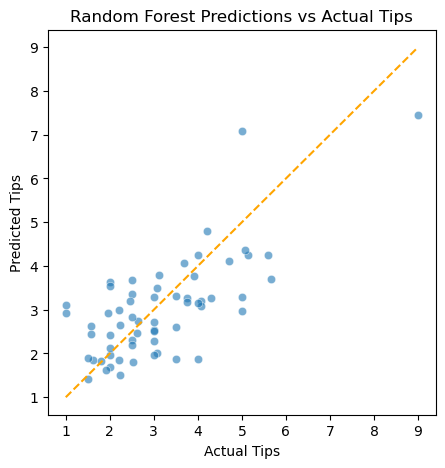

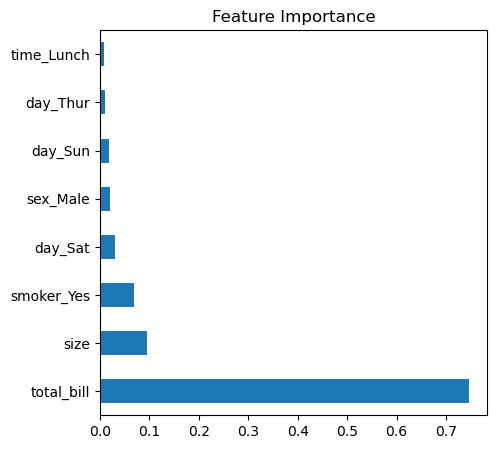

In [61]:
#I have been researching the mean absolute percentage error metric and I just wanted to see how it evaluted the model
mape = (abs((val_y - predictions) / val_y)).mean() * 100
print(f'MAPE: {mape:.2f}%')

#building the plot to demonstrate actual values vs predicted values
plt.figure(figsize=(5, 5))
sns.scatterplot(x=val_y, y=predictions, alpha=0.6)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], color='orange', linestyle='--')
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Random Forest Predictions vs Actual Tips')
plt.show()

#similarly as done in body_fat_percentage, I wanted to see the importance of the features. I want a visual this time
feature_importance = pd.Series(forest_model.feature_importances_, index=features)
feature_importance.nlargest(10).plot(kind='barh', figsize=(5, 5))
plt.title('Feature Importance')
plt.show()


A MAPE of 29.94% correlates with about a 70.06% accuracy. I am curious how this would compare to a singular Decision Tree model. 

It is not surprising that the tip is largely dependent on the total_bill size since it is just a percentage of it. I am interested to see how the model would perform without the total_bill. 

In [62]:
y = tips_encoded.tip 
features = [ 'size', 'sex_Male', 'smoker_Yes', 'day_Sat','day_Sun', 'day_Thur', 'time_Lunch']
X = tips_encoded[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
predictions = forest_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions)
print(mae)

1.0720295720799657


MAPE: 38.34%


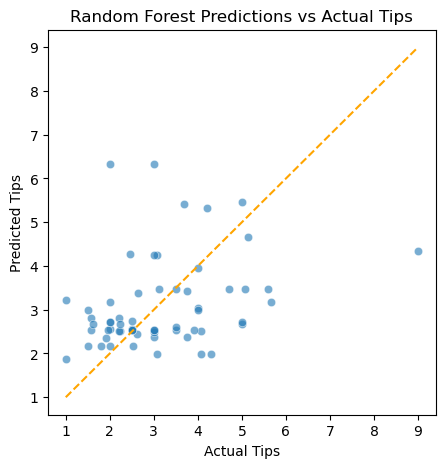

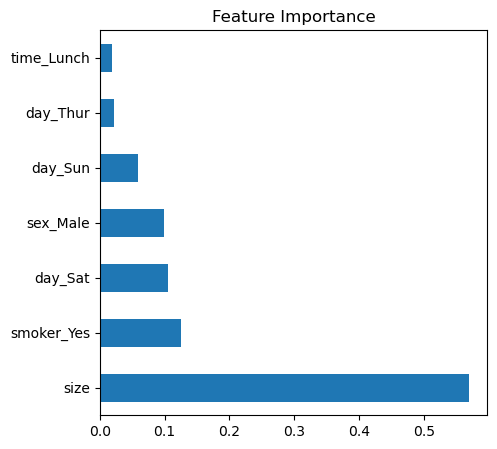

In [63]:
mape = (abs((val_y - predictions) / val_y)).mean() * 100
print(f'MAPE: {mape:.2f}%')

plt.figure(figsize=(5, 5))
sns.scatterplot(x=val_y, y=predictions, alpha=0.6)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], color='orange', linestyle='--')
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Random Forest Predictions vs Actual Tips')
plt.show()

feature_importance = pd.Series(forest_model.feature_importances_, index=features)
feature_importance.nlargest(10).plot(kind='barh', figsize=(5, 5))
plt.title('Feature Importance')
plt.show()

As expected, the model performed worse without the total bill price. Size seems to be the next largest determinate of tip size. This also intuitively makes sense because the more people, the larger the bill! (Also am intrested in graphing that relationship)

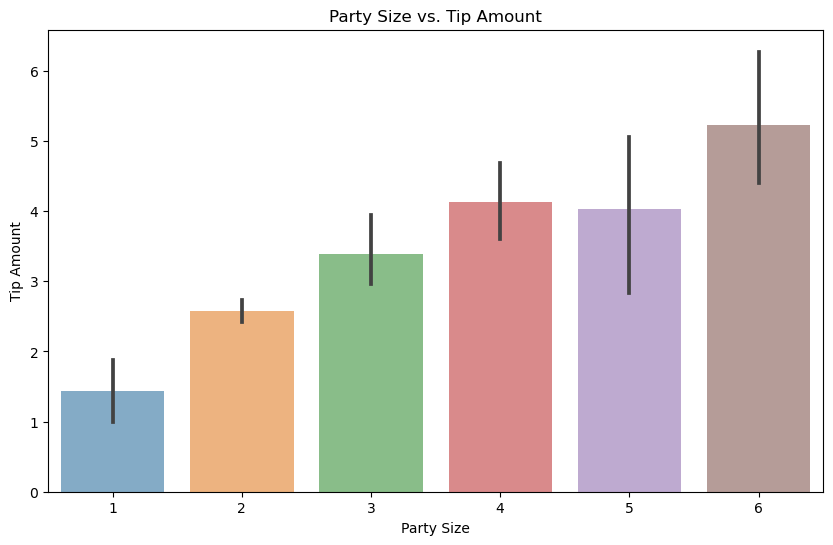

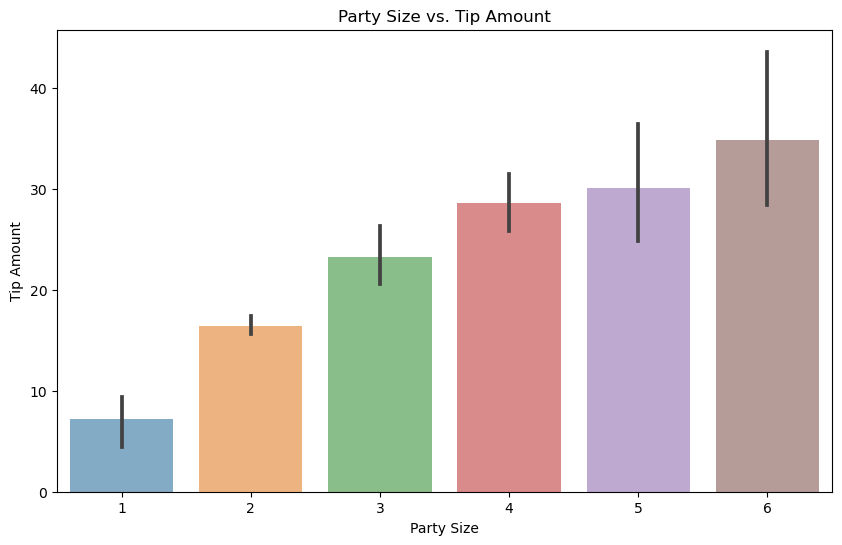

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tips_encoded, x='size', y='tip', alpha=0.6)
plt.xlabel('Party Size')
plt.ylabel('Tip Amount')
plt.title('Party Size vs. Tip Amount')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=tips_encoded, x='size', y='total_bill', alpha=0.6)
plt.xlabel('Party Size')
plt.ylabel('Tip Amount')
plt.title('Party Size vs. Tip Amount')
plt.show()

In [64]:
importance_list = list(zip(features, forest_model.feature_importances_))
importance_list.sort(key=lambda x: x[1], reverse=True)
for feature, importance in importance_list:
    print(f"{feature}: {importance}")

size: 0.5694385700250795
smoker_Yes: 0.12586188023310996
day_Sat: 0.10520209717803038
sex_Male: 0.09952097697528378
day_Sun: 0.05888157123988618
day_Thur: 0.021723752555006675
time_Lunch: 0.019371151793603738


In [68]:
y = tips_encoded.tip 
features = [ 'size', 'sex_Male', 'smoker_Yes', 'day_Sat','day_Sun']
X = tips_encoded[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
predictions = forest_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions)
print(mae)

1.0951495725705558


MAPE: 38.94%


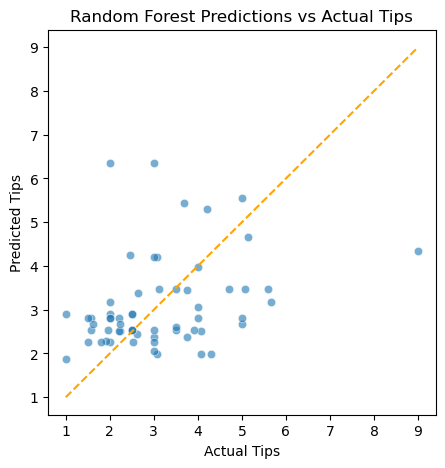

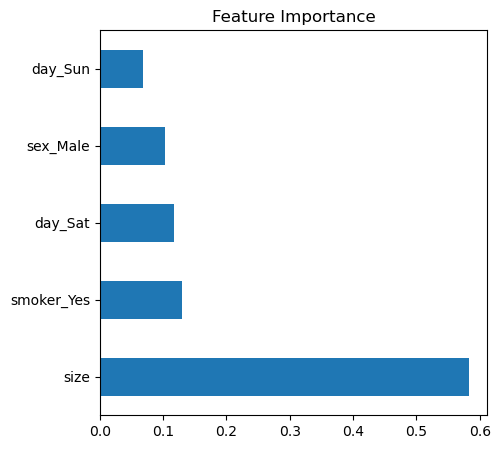

In [69]:
mape = (abs((val_y - predictions) / val_y)).mean() * 100
print(f'MAPE: {mape:.2f}%')

# Plot predictions vs actual values
plt.figure(figsize=(5, 5))
sns.scatterplot(x=val_y, y=predictions, alpha=0.6)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], color='orange', linestyle='--')
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Random Forest Predictions vs Actual Tips')
plt.show()

feature_importance = pd.Series(forest_model.feature_importances_, index=features)
feature_importance.nlargest(10).plot(kind='barh', figsize=(5, 5))
plt.title('Feature Importance')
plt.show()

Finally, I tried limiting the number of features to see if it would have an impact on overfitting, but it appears to be very similar to the performance of the previous model. 

In [67]:
importance_list = list(zip(features, forest_model.feature_importances_))
importance_list.sort(key=lambda x: x[1], reverse=True)
for feature, importance in importance_list:
    print(f"{feature}: {importance}")

size: 0.5828100794321545
smoker_Yes: 0.12981063355588812
day_Sat: 0.11642674971010293
sex_Male: 0.1027297696447365
day_Sun: 0.06822276765711799


In [73]:
y = tips_encoded.tip 
features = [ 'total_bill', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat','day_Sun', 'day_Thur', 'time_Lunch']
X = tips_encoded[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
forest_model = DecisionTreeRegressor(random_state=1)
forest_model.fit(train_X, train_y)
predictions = forest_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions)
print(mae)

1.2068852459016393


In this analysis, party size emerged as a key feature, likely due to its correlation with both the total bill and tip amount. Larger parties tend to have higher total bills, leading to larger tips. The Random Forest model effectively captured these relationships, demonstrating its capability to handle complex interactions within the data. Finally, I was able to show that the Random Forest Model did perform better than the Decision Tree Regression model (1.207 > 0.790). 